In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12,6)

In [2]:
data = pd.read_csv("Phishing_Legitimate_full.csv")

In [3]:
float_cols = data.select_dtypes('float64').columns
for c in float_cols:
    data[c] = data[c].astype('float32')
    
int_cols = data.select_dtypes('int64').columns
for c in int_cols:
    data[c] = data[c].astype('int32')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int32  
 1   NumDots                             10000 non-null  int32  
 2   SubdomainLevel                      10000 non-null  int32  
 3   PathLevel                           10000 non-null  int32  
 4   UrlLength                           10000 non-null  int32  
 5   NumDash                             10000 non-null  int32  
 6   NumDashInHostname                   10000 non-null  int32  
 7   AtSymbol                            10000 non-null  int32  
 8   TildeSymbol                         10000 non-null  int32  
 9   NumUnderscore                       10000 non-null  int32  
 10  NumPercent                          10000 non-null  int32  
 11  NumQueryComponents                  10000 

In [4]:
data.rename(columns={'CLASS_LABEL': 'labels'}, inplace=True)

In [5]:
data.sample(5)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
2732,2733,2,0,4,45,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,15,23,0,0,0,0,0.000000,0.000000,0,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
3264,3265,2,1,3,72,0,0,0,0,0,0,0,0,0,18,1,1,0,0,0,0,27,38,0,0,0,0,0.000000,0.785714,0,1,0,0,0,1.000000,1,0,0,0,0,1,0,0,1,0,-1,1,1,-1,1
7277,7278,1,0,5,72,3,0,0,0,0,0,0,0,0,8,1,1,0,0,0,0,16,49,0,0,0,0,0.207547,0.985915,1,1,1,1,0,0.056604,0,0,0,0,0,1,0,0,1,0,-1,0,-1,1,0
7281,7282,1,0,2,64,6,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,8,49,0,0,0,0,0.193333,0.814815,1,0,0,0,0,0.026667,0,0,0,0,1,0,0,0,1,0,-1,1,0,1,0
5094,5095,2,1,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,0,0,0,0,0.030769,0.851852,1,0,0,0,0,0.092308,0,0,0,0,0,1,0,0,1,1,0,1,-1,1,0


In [6]:
data.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,0.458600,0.277200,0.002300,5.810300,0.988800,0.52520,0.017200,0.022200,0.428900,0.0,18.82430,35.564900,8.606500,0.000900,0.109300,0.057100,0.241334,0.392932,0.167200,0.844000,0.248700,0.1018,0.057600,0.136135,0.215300,0.005500,0.014000,0.004900,0.128800,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,1.344793,1.117356,0.047906,9.617877,0.105241,0.49939,0.130023,0.147341,0.494944,0.0,8.11654,24.588502,24.313053,0.029988,0.368737,0.232045,0.342363,0.387295,0.373173,0.362873,0.432281,0.3024,0.232997,0.312426,0.411051,0.073961,0.117496,0.069832,0.334995,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.0,14.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.0,18.00000,30.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.247511,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.0,22.00000,48.000000,0.000000,0.000000,0.000000,0.000000,0.315874,0.785714,0.000000,1.000000,0.000000,0.0000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000

<AxesSubplot:>

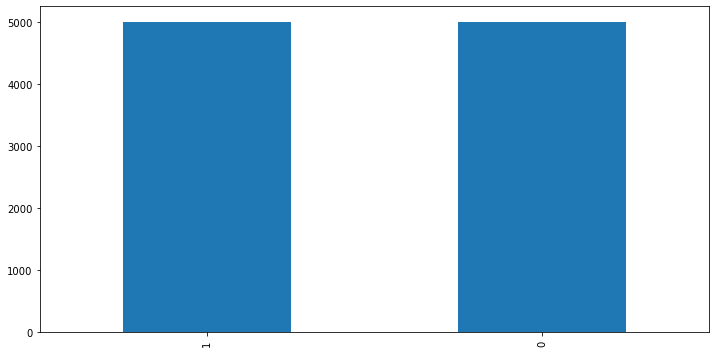

In [7]:
data['labels'].value_counts().plot(kind='bar')

In [8]:
def corr_heatmap(data, idx_s, idx_e):
    y = data['labels']
    temp = data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['labels'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()

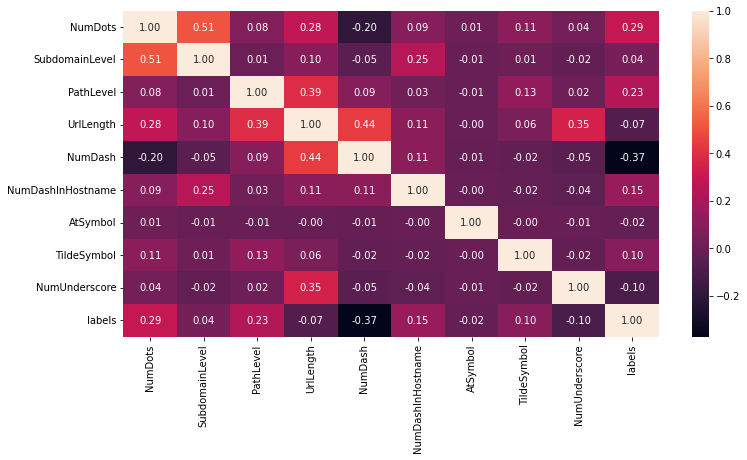

In [9]:
corr_heatmap(data, 0, 10)

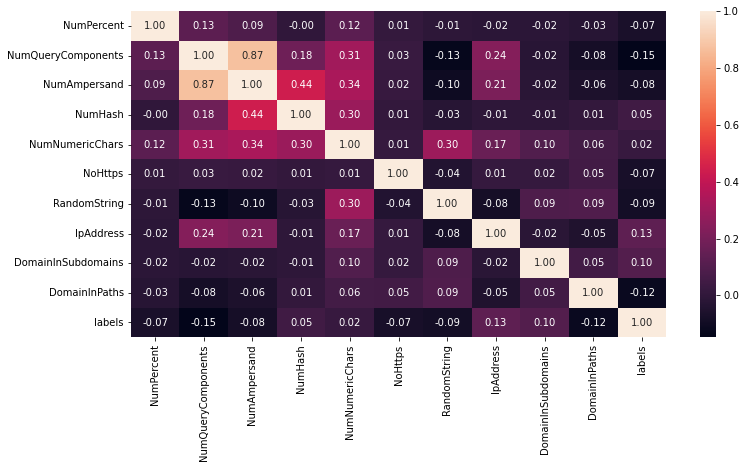

In [10]:
corr_heatmap(data, 10, 20)

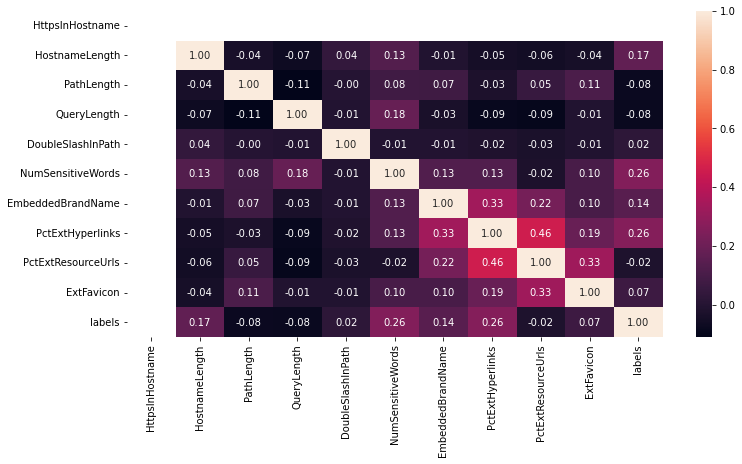

In [16]:
corr_heatmap(data, 20, 30)

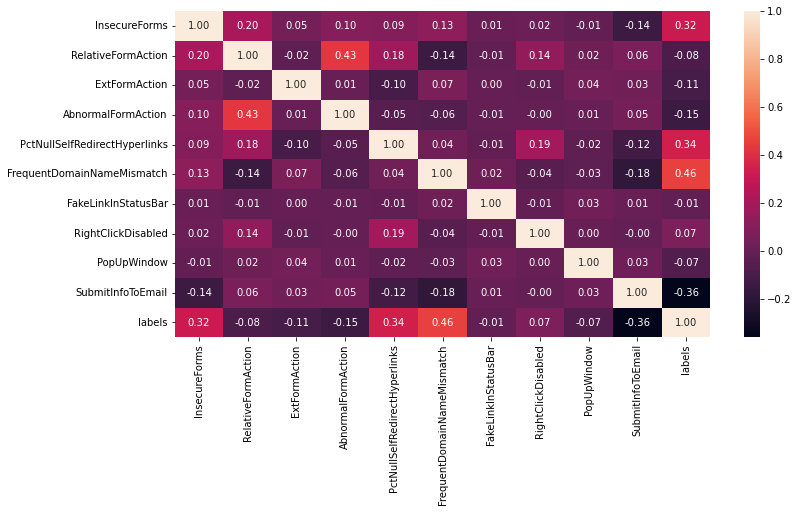

In [11]:
corr_heatmap(data, 30, 40)

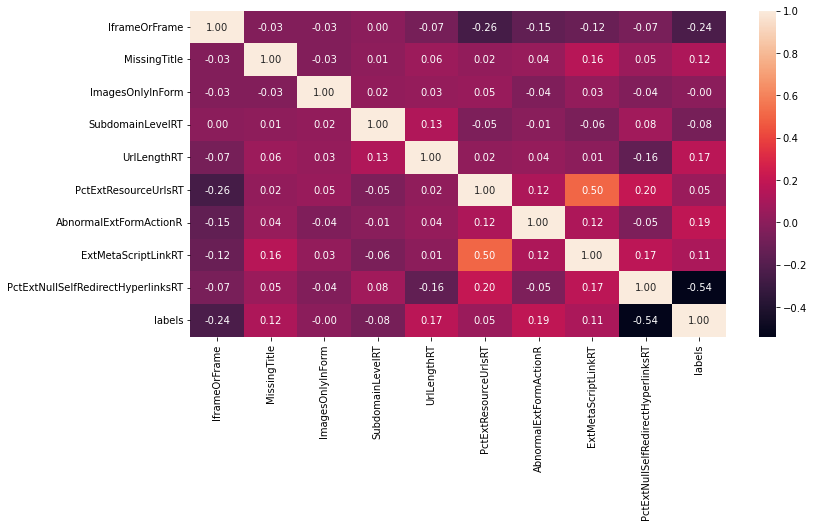

In [12]:
corr_heatmap(data, 40, 50)

In [13]:
from sklearn.feature_selection import mutual_info_classif

In [14]:
X = data.drop(['id', 'labels'], axis=1)
y = data['labels']

In [15]:
discrete_features = X.dtypes == int

In [16]:
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

PctExtHyperlinks                      4.706339e-01
PctExtResourceUrls                    2.941998e-01
PctNullSelfRedirectHyperlinks         2.348483e-01
PctExtNullSelfRedirectHyperlinksRT    2.123850e-01
NumNumericChars                       1.326711e-01
FrequentDomainNameMismatch            1.254908e-01
ExtMetaScriptLinkRT                   1.175434e-01
NumDash                               1.140136e-01
SubmitInfoToEmail                     7.802617e-02
NumDots                               6.553700e-02
PathLength                            6.413269e-02
QueryLength                           5.818557e-02
PathLevel                             5.543887e-02
InsecureForms                         5.508096e-02
UrlLength                             5.263855e-02
NumSensitiveWords                     4.180522e-02
NumQueryComponents                    3.361768e-02
PctExtResourceUrlsRT                  2.831059e-02
IframeOrFrame                         2.805496e-02
HostnameLength                 

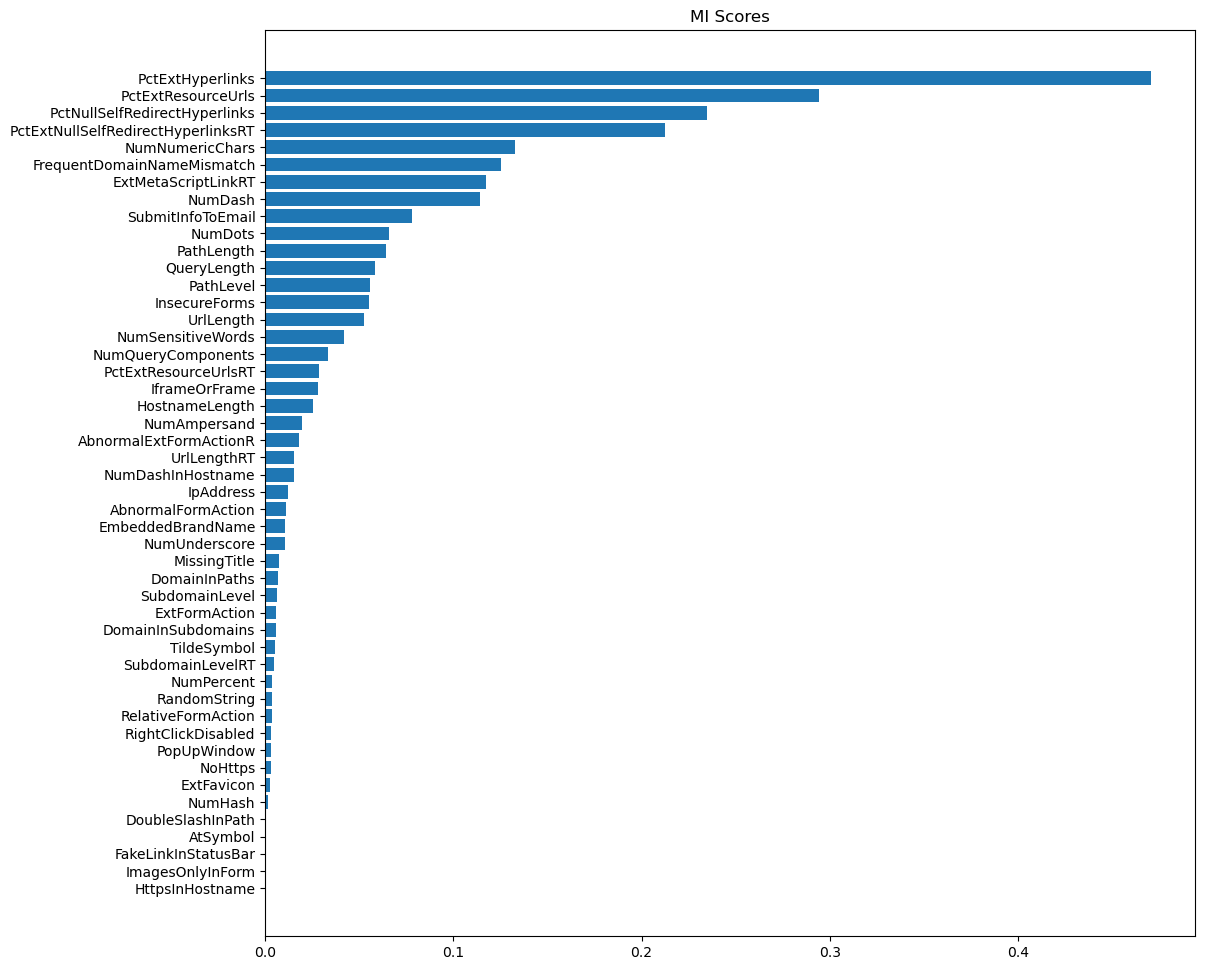

In [17]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("MI Scores")
    
plt.figure(dpi=100, figsize=(12,12))
plot_mi_scores(mi_scores)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [19]:
def train_logistic(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

In [20]:
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_logistic(data, i)
    print("Performance for Logistic Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for Logistic Model with Top 20 features is precision : 0.9264705882352942, recall : 0.9264705882352942, f1 score : 0.9264705882352942, accuracy : 0.925
Performance for Logistic Model with Top 21 features is precision : 0.9265700483091788, recall : 0.935609756097561, f1 score : 0.9310679611650486, accuracy : 0.929
Performance for Logistic Model with Top 22 features is precision : 0.9193391642371235, recall : 0.9311023622047244, f1 score : 0.9251833740831296, accuracy : 0.9235
Performance for Logistic Model with Top 23 features is precision : 0.9220272904483431, recall : 0.9338598223099703, f1 score : 0.9279058361942129, accuracy : 0.9265
Performance for Logistic Model with Top 24 features is precision : 0.9257086999022482, recall : 0.9348469891411648, f1 score : 0.9302554027504911, accuracy : 0.929
Performance for Logistic Model with Top 25 features is precision : 0.9217986314760508, recall : 0.943943943943944, f1 score : 0.9327398615232443, accuracy : 0.932
Performance for 

In [22]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.926471,0.926471,0.926471,0.9250
1,21,0.926570,0.935610,0.931068,0.9290
2,22,0.919339,0.931102,0.925183,0.9235
3,23,0.922027,0.933860,0.927906,0.9265
4,24,0.925709,0.934847,0.930255,0.9290
5,25,0.921799,0.943944,0.932740,0.9320
6,26,0.938124,0.933466,0.935789,0.9355
7,27,0.914423,0.935103,0.924648,0.9225
8,28,0.929537,0.940430,0.934951,0.9330
9,29,0.926428,0.933659,0.930029,0.9280


<AxesSubplot:xlabel='num_of_features', ylabel='precision'>

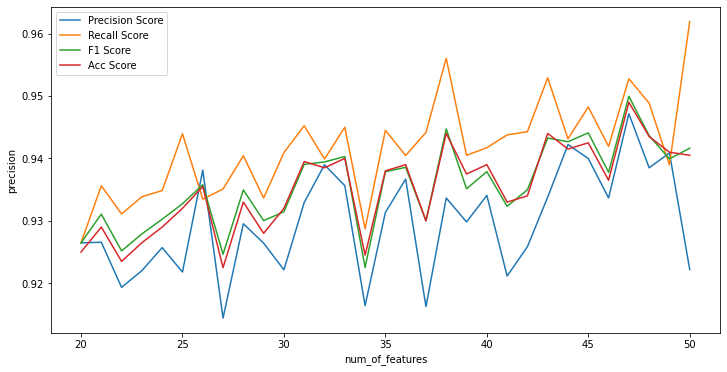

In [23]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

In [42]:
def train_rfc(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    rfc = RandomForestClassifier(n_estimators=500,  max_depth=32, max_features=1.0)
    
    rfc.fit(X_train, y_train)
    
    y_pred = rfc.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

In [43]:
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_rfc(data, i)
    print("Performance for RFC Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for RFC Model with Top 20 features is precision : 0.9763374485596708, recall : 0.9783505154639175, f1 score : 0.9773429454170957, accuracy : 0.978
Performance for RFC Model with Top 21 features is precision : 0.9809236947791165, recall : 0.977, f1 score : 0.9789579158316633, accuracy : 0.979
Performance for RFC Model with Top 22 features is precision : 0.9736842105263158, recall : 0.9832677165354331, f1 score : 0.9784524975514203, accuracy : 0.978
Performance for RFC Model with Top 23 features is precision : 0.9708249496981891, recall : 0.9727822580645161, f1 score : 0.9718026183282981, accuracy : 0.972
Performance for RFC Model with Top 24 features is precision : 0.9762376237623762, recall : 0.985014985014985, f1 score : 0.9806066633515664, accuracy : 0.9805
Performance for RFC Model with Top 25 features is precision : 0.9822660098522168, recall : 0.9717348927875243, f1 score : 0.9769720725134738, accuracy : 0.9765
Performance for RFC Model with Top 26 features is precisio

<AxesSubplot:xlabel='num_of_features', ylabel='precision'>

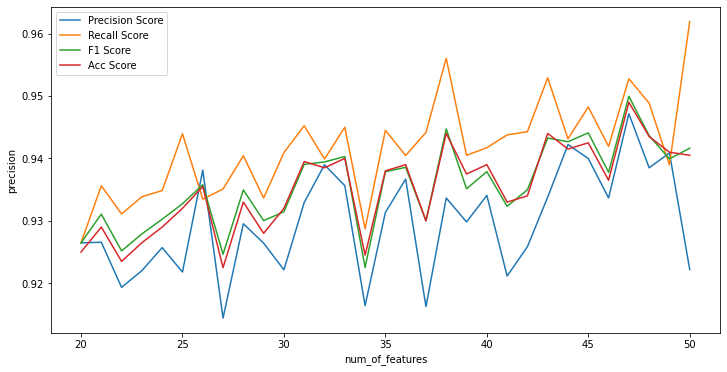

In [44]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

In [45]:
top_n_features = mi_scores.sort_values(ascending=False).head(32).index.tolist()
X = data[top_n_features]
y = data['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

rfc = RandomForestClassifier(n_estimators=500, max_depth=32, max_features=1.0)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [46]:
print("Performance for RFC Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(27, precision, recall, f1, accuracy))

Performance for RFC Model with Top 27 features is precision : 0.9695481335952849, recall : 0.9733727810650887, f1 score : 0.9714566929133859, accuracy : 0.971


In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       986
           1       0.97      0.97      0.97      1014

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

